# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Plasticita - reologické modely - jednoosá napjatost

## Zadání
  Na obrázku je pružnoplastický model tvořený dvěma pružinami  o tuhostech $E_0 = 100$ GPa a $E_1 = 25$ GPa a dvěma plastickými články s mezí kluzu $\sigma_{p1} = 100$ MPa a $\sigma_{p2} = 120$ MPa.

Sestrojte pracovní diagram odpovídající zatěžovacímu programu, při kterém se deformace nejprve plynule zvýší z nuly na hodnotu 3 promile a poté se bude plynule snižovat až do hodnoty -3 promile.

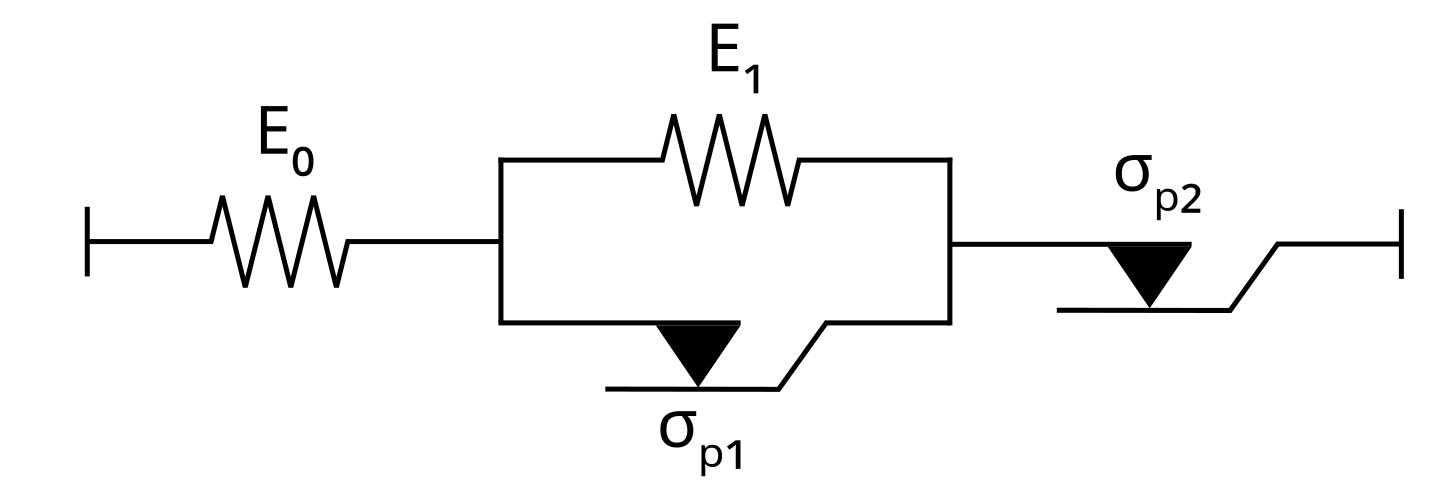

In [1]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_zadani.png", width=600))

Import potřebných knihoven

In [2]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

#!pip install sympy
from sympy import *
import sympy as smp


## Řešení

In [3]:
# Hodnoty vstupních parametrů dle zadání:
E0 = 100 * 1000 # MPa
E1 = 25 * 1000 # MPa
sigma_p1 = 100 # MPa
sigma_p2 = 120 # MPa
epsilon_max = 0.003
epsilon_min = -0.003

# Inicializace prázdných seznamů pro napětí a deformaci
strain_values = []  # Seznam pro celkové deformace
stress_values = []  # Seznam pro celkové napětí



Úlohu budeme řešit v jednotlivých krocích, které jsou definovány dosažením určitého mezního stavu, kdy dojde ke změně v chování modelu. Jednotlivé stavy označíme písmeny A - F.  
V každém kroku si uložíme hodnotu napětí a celkové deformace modelu pro výsledné vykreslení pracovního diagramu.

V každém z kroků budeme počítat dílčí hodnoty deformací a napětí, které jsou označeny takto:  
$σ_0$ ... napětí v pružině s tuhostí $E_0$  
$ε_0$ ... deformace pružiny o tuhosti $E_0$  
$σ_{1el}$ ... napětí v pružině s tuhostí $E_1$  
$σ_{1pl}$ ... napětí v plastickém článku s mezí kluzu $σ_{p1}$  
$ε_1$ ... deformace článku 1 (obě paralelní větve musí mít stejnou deformaci)  
$σ_2$ ... napětí v plastickém článku s mezí kluzu $σ_{p2}$  
$ε_2$ ... deformace plastického článku s mezí kluzu $σ_{p2}$

Celková deformace $ε$ je v každém kroku rovna součtu deformací jednotlivých článků modelu $ε = ε_0 + ε_1 + ε_2$.

Pro přehlednost je u každého stavu vykresleno schéma modelu s uvedením konkrétních hodnot napětí a deformací ve všech částech modelu. Tyto obrázky ale slouží pouze pro účely tohoto konkrétního zadání, nejsou (narozdíl od výpočtu a grafu) interaktivně upravovány při změně vstupních parametrů.

Vstupní hodnoty tuhostí a mezí kluzu, stejně jako hodnoty předepsané deformace je možné upravovat, je však nutné, aby mez kluzu plastického článku zapojeného paralelně s pružinou byla menší než mez kluzu samostatně zapojeného plastického článku. V opačném případě by nemohlo dojít k aktivaci pružiny $E_1$ a výpočet by bylo nutné upravit.
Stejně tak je nutné výpočet upravit, pokud by k dosažení maximální či minimální předepsané deformace došlo dříve, než dojde k dosažení mezního napětí v plastickém článku $σ_{p1}$ či $σ_{p2}$, na čož ale tento výpočet upozorní.


### A - počáteční (nulový) stav

In [4]:
# Na počátku jsou všechny hodnoty napětí a deformací rovny nule
sigma0 = 0
epsilon0 = 0
sigma1el = 0
sigma1pl = 0
epsilon1 = 0
sigma2 = 0
epsilon2 = 0

sigma_A = sigma0
epsilon_A = epsilon0 + epsilon1 + epsilon2

strain_values.append(epsilon_A)  # Uložení deformace
stress_values.append(sigma_A)  # Uložení napětí

print(f"sigma0 = {sigma0} MPa")
print(f"sigma1el = {sigma1el} MPa")
print(f"sigma1pl = {sigma1pl} MPa")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon0 = {epsilon0}")
print(f"epsilon1 = {epsilon1}")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při počátku zatížení je: {sigma_A} MPa")
print(f"Celková deformace při počátku zatížení je: {epsilon_A}")


sigma0 = 0 MPa
sigma1el = 0 MPa
sigma1pl = 0 MPa
sigma2 = 0 MPa
epsilon0 = 0
epsilon1 = 0
epsilon2 = 0


Celkové napětí při počátku zatížení je: 0 MPa
Celková deformace při počátku zatížení je: 0


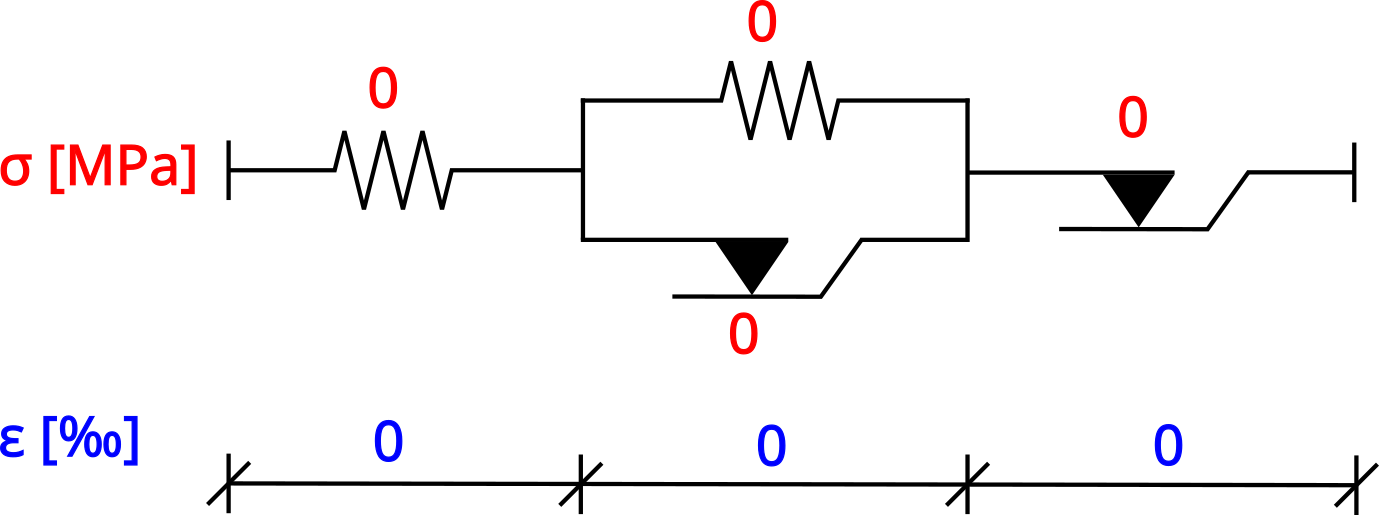

In [5]:

from IPython.display import display, Image
display(Image(filename="Plasticita_1D_stav_A.png", width=400))

### B - dosažení mezního napětí v prvním plastickém článku

Až do dosažení hodnoty $\sigma_{p1}$ se model chová pružně s celkovou tuhostí $E_0$. Před dosažením mezního napětí $σ_{p1}$ nedojde k posunu v plastických článcích, proto nedojde ani k deformaci pružiny $E_1$ a veškerá deformace se realizuje pouze v pružině $E_0$.

In [6]:
sigma_B = sigma_p1
sigma0 = sigma_B
sigma1el = 0
sigma1pl = sigma_B - sigma1el
sigma2 = sigma_B

epsilon0 = sigma0/E0
epsilon1 = 0
epsilon2 = 0

epsilon_B = epsilon0 + epsilon1 + epsilon2

#kontrola, zda nebylo dosaženo maximální předepsané deformace dříve než mezní hodnoty napětí v prvním plastickém článku:
if epsilon_B <= epsilon_max:
    print("Pozn.: kontrola maximální předepsané deformace je v pořádku.")
else:
    print("VAROVÁNÍ: Požadované napětí sigma_B nelze dosáhnout, protože dříve dojde k dosažení maximální předepsdané deformace. Je potřeba změnit vstupní hodnoty úlohy, případně upravit tento i další kroky výpočtu.")

strain_values.append(epsilon_B)  # Uložení deformace
stress_values.append(sigma_B)  # Uložení napětí

print("\n")
print(f"sigma0 = {sigma0} MPa")
print(f"sigma1el = {sigma1el} MPa")
print(f"sigma1pl = {sigma1pl} MPa")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon0 = {epsilon0}")
print(f"epsilon1 = {epsilon1}")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při dosažení mezního napětí v prvním plastickém článku je: {sigma_B} MPa")
print(f"Celková deformace při dosažení mezního napětí v prvním plastickém článku je: {epsilon_B*1000} × 10⁻³")


Pozn.: kontrola maximální předepsané deformace je v pořádku.


sigma0 = 100 MPa
sigma1el = 0 MPa
sigma1pl = 100 MPa
sigma2 = 100 MPa
epsilon0 = 0.001
epsilon1 = 0
epsilon2 = 0


Celkové napětí při dosažení mezního napětí v prvním plastickém článku je: 100 MPa
Celková deformace při dosažení mezního napětí v prvním plastickém článku je: 1.0 × 10⁻³


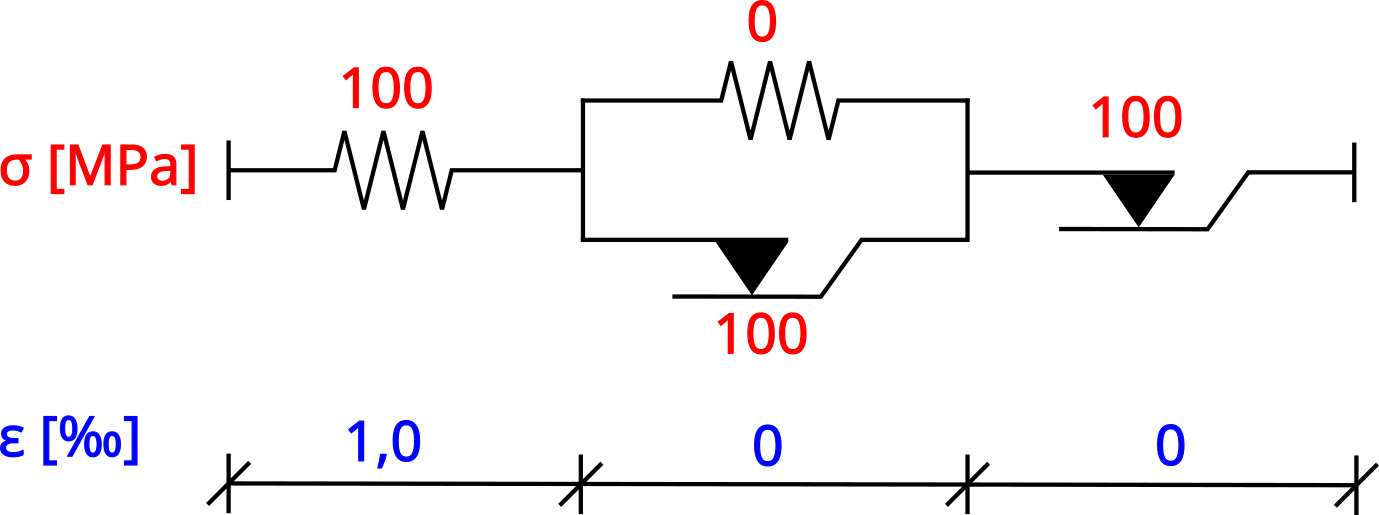

In [7]:

from IPython.display import display, Image
display(Image(filename="Plasticita_1D_stav_B.png", width=400))

### C - dosažení mezního napětí ve druhém plastickém článku

Po dasažení stavu B dojde k aktivaci pružiny $E_1$, která přenáší přírůstek napětí a dochází proto k její deformaci, plastický článek $\sigma_{p1}$ již další napětí přenášet nedokáže. Tento vývoj pokračuje až do dosažení mezního napětí v článku $\sigma_{p2}$.

In [8]:
sigma_C = sigma_p2
sigma0 = sigma_C
sigma1el = sigma_C - sigma_p1
sigma1pl = sigma_p1
sigma2 = sigma_C

epsilon0 = sigma0/E0
epsilon1 = sigma1el/E1
epsilon2 = 0

epsilon_C = epsilon0 + epsilon1 + epsilon2

#kontrola, zda nebylo dosaženo maximální předepsané deformace dříve než mezní hodnoty napětí ve druhém plastickém článku:
if epsilon_C <= epsilon_max:
    print("Pozn.: kontrola maximální předepsané deformace je v pořádku.")
else:
    print("VAROVÁNÍ: Požadované napětí sigma_C nelze dosáhnout, protože dříve dojde k dosažení maximální předepsdané deformace. Tento krok i další výpočet je nutné upravit.")

strain_values.append(epsilon_C)  # Uložení deformace
stress_values.append(sigma_C)  # Uložení napětí

print("\n")
print(f"sigma0 = {sigma0} MPa")
print(f"sigma1el = {sigma1el} MPa")
print(f"sigma1pl = {sigma1pl} MPa")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon0 = {epsilon0}")
print(f"epsilon1 = {epsilon1}")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při dosažení mezního napětí ve druhém plastickém článku je: {sigma_C} MPa")
print(f"Celková deformace při dosažení mezního napětí ve druhém plastickém článku je: {epsilon_C*1000} × 10⁻³")


Pozn.: kontrola maximální předepsané deformace je v pořádku.


sigma0 = 120 MPa
sigma1el = 20 MPa
sigma1pl = 100 MPa
sigma2 = 120 MPa
epsilon0 = 0.0012
epsilon1 = 0.0008
epsilon2 = 0


Celkové napětí při dosažení mezního napětí ve druhém plastickém článku je: 120 MPa
Celková deformace při dosažení mezního napětí ve druhém plastickém článku je: 2.0 × 10⁻³


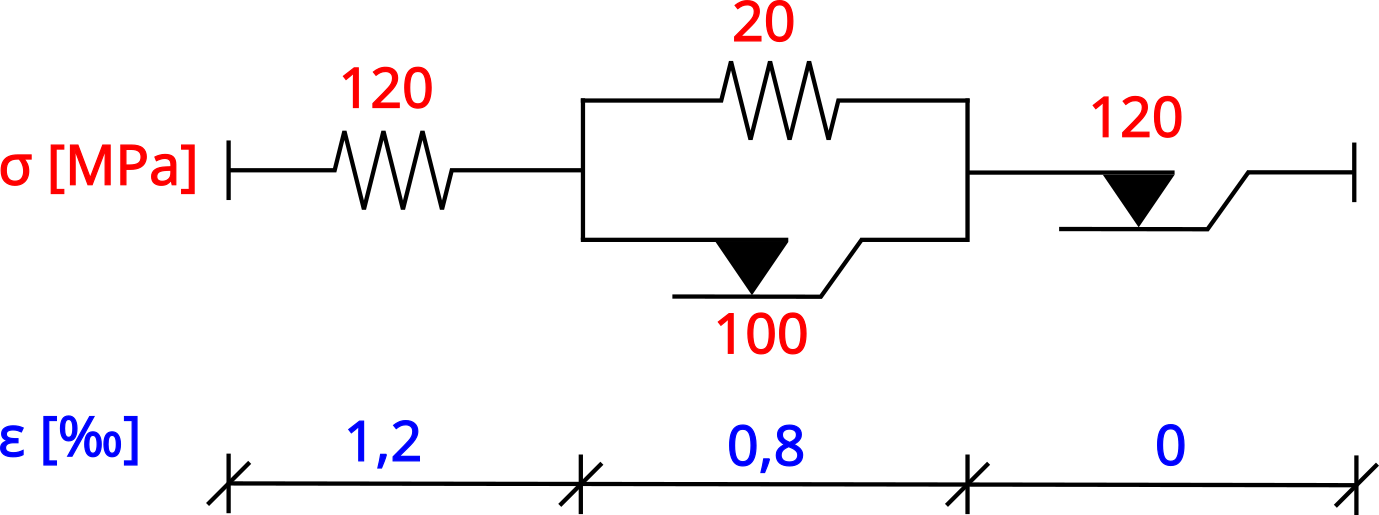

In [9]:

from IPython.display import display, Image
display(Image(filename="Plasticita_1D_stav_C.png", width=400))

### D - dosažení předepsané maximální deformace

Bylo dosaženo mezní hodnoty napětí v sériově zapojeném plastickém článku, model již větší napětí nedokáže přenášet, dochází k plastickému tečení ve druhém plastickém článku bez dalšího nárůstu napětí. To pokračuje až do dosažení maximální předepsané deformace.

In [10]:
sigma_D = sigma_C  # beze změny
sigma0 = sigma0  # beze změny
sigma1el = sigma1el  # beze změny
sigma1pl = sigma1pl  # beze změny
sigma2 = sigma_D  # beze změny

epsilon0 = epsilon0  # beze změny
epsilon1 = epsilon1  # beze změny
epsilon2 = epsilon_max - epsilon0 - epsilon1

epsilon_D = epsilon0 + epsilon1 + epsilon2

strain_values.append(epsilon_D)  # Uložení deformace
stress_values.append(sigma_D)  # Uložení napětí

print("\n")
print(f"sigma0 = {sigma0} MPa")
print(f"sigma1el = {sigma1el} MPa")
print(f"sigma1pl = {sigma1pl} MPa")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon0 = {epsilon0}")
print(f"epsilon1 = {epsilon1}")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při dosažení maximální předepsané deformace je: {sigma_D} MPa")
print(f"Celková deformace je rovna maximální předepsané deformaci: {epsilon_D*1000} × 10⁻³")




sigma0 = 120 MPa
sigma1el = 20 MPa
sigma1pl = 100 MPa
sigma2 = 120 MPa
epsilon0 = 0.0012
epsilon1 = 0.0008
epsilon2 = 0.001


Celkové napětí při dosažení maximální předepsané deformace je: 120 MPa
Celková deformace je rovna maximální předepsané deformaci: 3.0 × 10⁻³


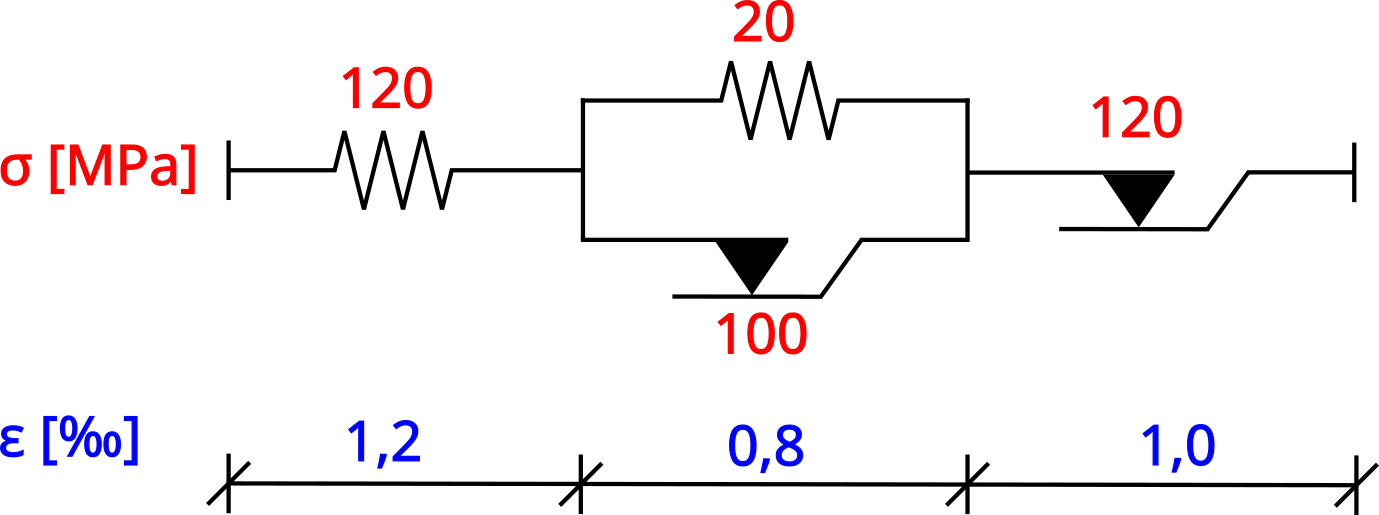

In [11]:

from IPython.display import display, Image
display(Image(filename="Plasticita_1D_stav_D.png", width=400))

### E - dosažení mezního tlakového napětí v prvním plastickém článku

Ve fázi D bylo dosaženo maximální předepsané deformace (kladné). Nyní je předepsán pokles deformace, celkové napětí se snižuje a plynule přejde až do tlaku. Deformace obou plastických článků zůstává zachována až do doby, než je opět dosaženo jejich mezního napětí.

Po odtížení (nulové celkové napětí) zůstává ve druhém článku zafixována deformace z předešlého kroku, pružina $E_1$ působí po odtížení modelu úměrně deformaci tlakem na paralelně připojený plastický článek. Další snižování napětí přebírá plastický článek a proto je k dasažení mezního napětí v prvním plastickém článku potřeba nižší celkové tlakové napětí v modelu než je mez kluzu $σ_{p1}$.

Až do dosažení mezního napětí v prvním plastickém článku odpovídá chování modelu pružnému materiálu s tuhostí $E_0$, deformace se mění pouze v pružném článku $E_0$.

In [12]:
sigma_E = -sigma_p1 + sigma1el
sigma0 = sigma_E
sigma1el = sigma1el  # beze změny
sigma1pl = sigma_E - sigma1el
sigma2 = sigma_E

epsilon0 = sigma0 / E0
epsilon1 = epsilon1  # beze změny
epsilon2 = epsilon2  # beze změny

epsilon_E = epsilon0 + epsilon1 + epsilon2

# kontrola, zda nebylo dosaženo maximální předepsané deformace dříve než mezní hodnoty napětí v prvním plastickém článku:
if epsilon_B >= epsilon_min:
    print("Pozn.: kontrola maximální záporné předepsané deformace je v pořádku.")
else:
    print("VAROVÁNÍ: Požadované napětí sigma_E nelze dosáhnout, protože dříve dojde k dosažení maximální předepsdané deformace. Je potřeba změnit vstupní hodnoty úlohy, případně upravit tento i další kroky výpočtu.")

strain_values.append(epsilon_E)  # Uložení deformace
stress_values.append(sigma_E)  # Uložení napětí

print("\n")
print(f"sigma0 = {sigma0} MPa")
print(f"sigma1el = {sigma1el} MPa")
print(f"sigma1pl = {sigma1pl} MPa")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon0 = {epsilon0}")
print(f"epsilon1 = {epsilon1}")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při dosažení mezního tlakového napětí v prvním plastickém článku je: {sigma_E} MPa")
print(f"Celková deformace při dosažení mezního tlakového napětí v prvním plastickém článku je: {epsilon_E*1000} × 10⁻³")


Pozn.: kontrola maximální záporné předepsané deformace je v pořádku.


sigma0 = -80 MPa
sigma1el = 20 MPa
sigma1pl = -100 MPa
sigma2 = -80 MPa
epsilon0 = -0.0008
epsilon1 = 0.0008
epsilon2 = 0.001


Celkové napětí při dosažení mezního tlakového napětí v prvním plastickém článku je: -80 MPa
Celková deformace při dosažení mezního tlakového napětí v prvním plastickém článku je: 1.0 × 10⁻³


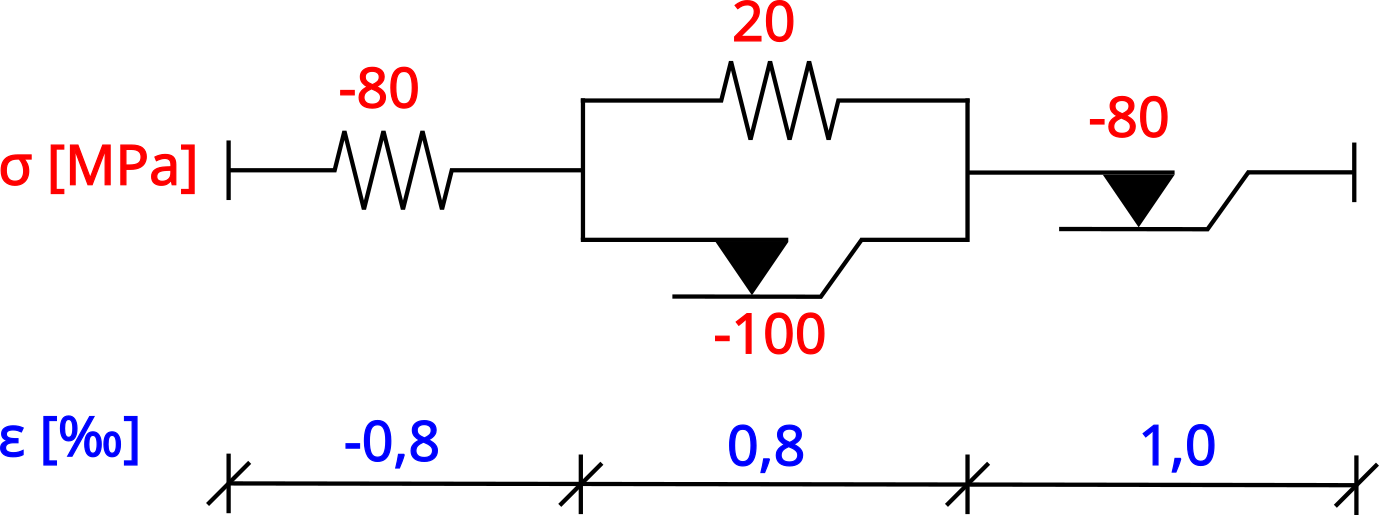

In [13]:

from IPython.display import display, Image
display(Image(filename="Plasticita_1D_stav_E.png", width=400))

### F - dosažení mezního tlakového napětí ve druhém plastickém článku

V prvním plastickém článku zapojeném paralelně s pružinou již bylo dosaženo mezního napětí, další pokles napětí přebírá pružina $E_1$, která je postupně stlačována. Zároveň pokračuje stlačování pružiny $E_0$. Tuhost modelu při klesajícím napětí odpovídá seriovému zapojení pružin $E_0$ a $E_1$, a to až do dosažení mezního tlakového napětí ve druhém plastickém článku.

In [14]:
sigma_F = -sigma_p2
sigma0 = sigma_F
sigma1el = sigma_F + sigma_p1
sigma1pl = -sigma_p1
sigma2 = sigma_F

epsilon0 = sigma0 / E0
epsilon1 = sigma1el / E1
epsilon2 = epsilon2  # beze změny

epsilon_F = epsilon0 + epsilon1 + epsilon2

# kontrola, zda nebylo dosaženo maximální záporné předepsané deformace dříve než mezní hodnoty napětí ve druhém plastickém článku:
if epsilon_C <= epsilon_max:
    print("Pozn.: kontrola maximální záporné předepsané deformace je v pořádku.")
else:
    print("VAROVÁNÍ: Požadovaného napětí sigma_F nelze dosáhnout, protože dříve dojde k dosažení maximální předepsdané deformace. Tento krok i další výpočet je nutné upravit.")

strain_values.append(epsilon_F)  # Uložení deformace
stress_values.append(sigma_F)  # Uložení napětí

print("\n")
print(f"sigma0 = {sigma0} MPa")
print(f"sigma1el = {sigma1el} MPa")
print(f"sigma1pl = {sigma1pl} MPa")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon0 = {epsilon0}")
print(f"epsilon1 = {epsilon1}")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při dosažení mezního tlakového napětí ve druhém plastickém článku je: {sigma_F} MPa")
print(f"Celková deformace při dosažení mezního tlakového napětí ve druhém plastickém článku je: {epsilon_F*1000} × 10⁻³")



Pozn.: kontrola maximální záporné předepsané deformace je v pořádku.


sigma0 = -120 MPa
sigma1el = -20 MPa
sigma1pl = -100 MPa
sigma2 = -120 MPa
epsilon0 = -0.0012
epsilon1 = -0.0008
epsilon2 = 0.001


Celkové napětí při dosažení mezního tlakového napětí ve druhém plastickém článku je: -120 MPa
Celková deformace při dosažení mezního tlakového napětí ve druhém plastickém článku je: -1.0 × 10⁻³


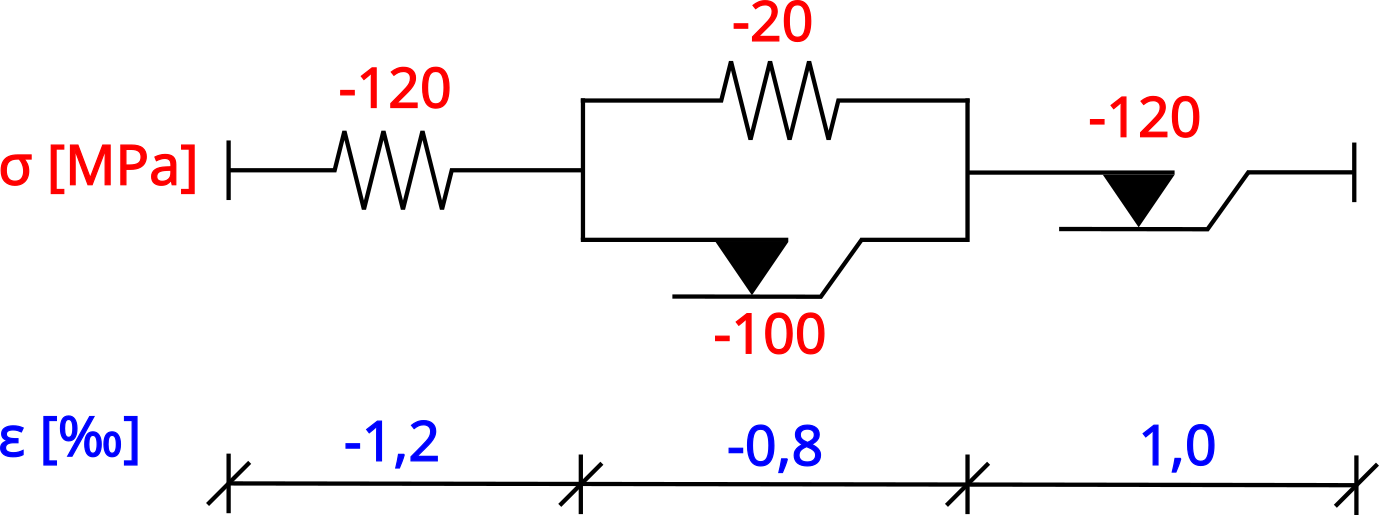

In [15]:

from IPython.display import display, Image
display(Image(filename="Plasticita_1D_stav_F.png", width=400))

### G - dosažení předepsané maximální záporné deformace

Bylo dosaženo mezní hodnoty tlakového napětí v sériově zapojeném plastickém článku $σ_{p2}$, model již větší tlakové napětí nedokáže přenášet, dochází k plastickému přetváření v tomto článku bez další změny napětí. To pokračuje až do dosažení maximální záporné předepsané deformace.

In [16]:
sigma_G = -sigma_p2
sigma0 = sigma_G
sigma1pl = -sigma_p1
sigma1el = sigma_G + sigma1pl
sigma2 = sigma_G

epsilon0 = epsilon0  # beze změny
epsilon1 = epsilon1  # beze změny
epsilon2 = epsilon_min - epsilon0 - epsilon1

epsilon_G = epsilon0 + epsilon1 + epsilon2

strain_values.append(epsilon_G)  # Uložení deformace
stress_values.append(sigma_G)  # Uložení napětí

print("\n")
print(f"sigma0 = {sigma0} MPa")
print(f"sigma1el = {sigma1el} MPa")
print(f"sigma1pl = {sigma1pl} MPa")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon0 = {epsilon0}")
print(f"epsilon1 = {epsilon1}")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při dosažení maximální záporné předepsané deformace je: {sigma_G} MPa")
print(f"Celková deformace je rovna maximální záporné předepsané deformaci: {epsilon_G*1000} × 10⁻³")





sigma0 = -120 MPa
sigma1el = -220 MPa
sigma1pl = -100 MPa
sigma2 = -120 MPa
epsilon0 = -0.0012
epsilon1 = -0.0008
epsilon2 = -0.001


Celkové napětí při dosažení maximální záporné předepsané deformace je: -120 MPa
Celková deformace je rovna maximální záporné předepsané deformaci: -3.0 × 10⁻³


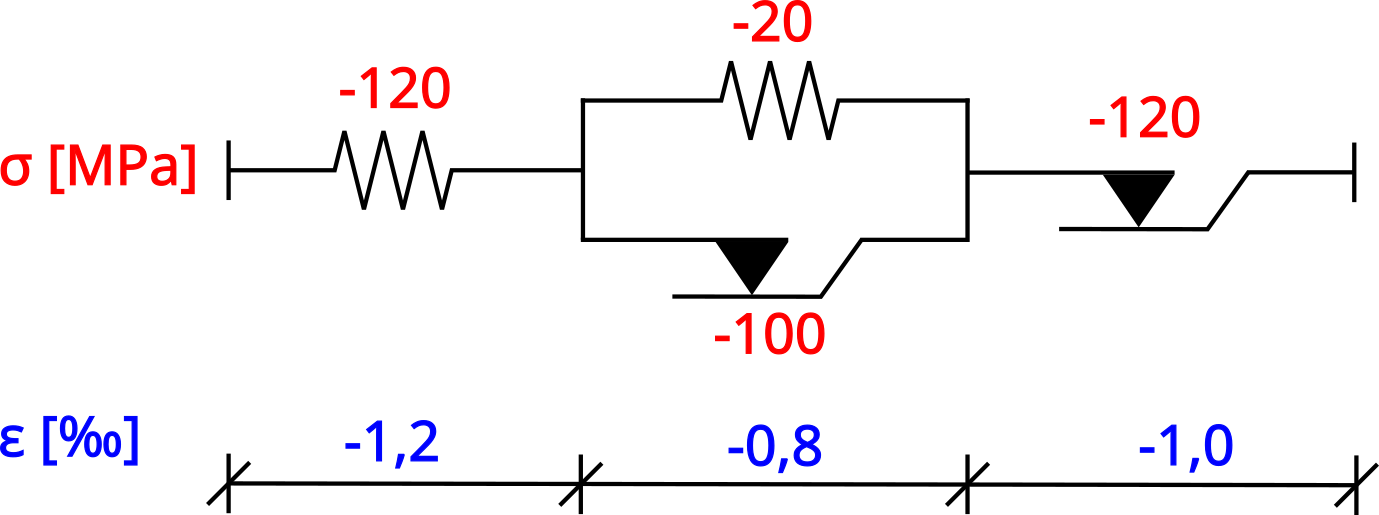

In [17]:

from IPython.display import display, Image
display(Image(filename="Plasticita_1D_stav_G.png", width=400))

### Vykreslení pracovního diagramu

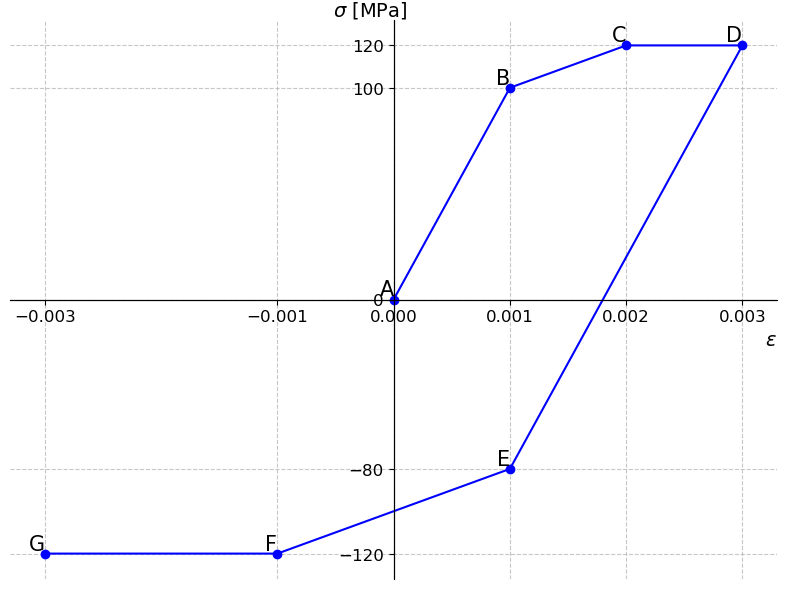

In [18]:
# Písmena odpovídající jednotlivým bodům
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Vykreslení pracovního diagramu
plt.figure(figsize=(8, 6))
plt.plot(strain_values, stress_values, '-o', color='blue')

# Přidání popisků k bodům
for x, y, label in zip(strain_values, stress_values, labels):
    plt.text(x, y, label, fontsize=15, ha='right', va='bottom', color='black')

# Nastavení os
plt.axhline(0, color='black', linewidth=0.8)  # Vodorovná osa
plt.axvline(0, color='black', linewidth=0.8)  # Svislá osa
plt.gca().spines['top'].set_visible(False)   # Skrytí horního rámečku
plt.gca().spines['right'].set_visible(False) # Skrytí pravého rámečku
plt.gca().spines['bottom'].set_position('zero') # Posunutí spodní osy na střed
plt.gca().spines['left'].set_position('zero')   # Posunutí levé osy na střed

# Přidání explicitních značek na osy
plt.xticks(sorted(set(strain_values)), fontsize=12)
plt.yticks(sorted(set(stress_values)), fontsize=12)

# Nastavení popisů os
plt.xlabel('$\\epsilon$', fontsize=14, loc='right')
plt.ylabel('$\\sigma$ [MPa]', fontsize=14, rotation=0, labelpad=-50, loc='top')

# Mřížka pro lepší přehlednost
plt.grid(True, linestyle='--', alpha=0.7)

# Zobrazení grafu
plt.tight_layout()
plt.show()